In [ ]:
# 1.Run it
# 3.Load and preprocess your images
# 4.Perform both hierarchical and K-means clustering
# 5.Show visualizations (dendrogram, elbow curve, 3D cluster plots)
# 6.Provide detailed metrics and comparisons
# 7.Make a recommendation about which method is more suitable
# 8.The output will include:
# Dataset summary
# Outlier analysis
# PCA explained variance
# Clustering visualizations
# Performance metrics for both methods
# Final recommendation

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from sklearn.cluster import KMeans, AgglomerativeClustering
#using centroid values of datapoint it will cluster partition unsupervised method
#AgglomerativeClustering:bottom-up approach take  starts with each point as a cluster

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#sc(how well cluster separated) : how similar an object is to its own cluster compared to other clusters
#dbs(compare different clustering):Measures average similarity between clusters LS=Better clustering
#chs(how well the cluster defined) : Ratio of between-cluster  and within-cluster HS=Better clustering defined

from scipy.cluster.hierarchy import dendrogram, linkage
#dendrogram:optimal number of clusters


from scipy import stats
import time

Loading images from C:\Users\lsrin\Downloads\TS-2\Adavance_ML\Lab-5\TRAIL_DATA\TRAINING...
Processed 20 images from class glioma_tumor
Processed 19 images from class meningioma_tumor
Processed 25 images from class no_tumor
Processed 20 images from class pituitary_tumor

Dataset Summary:
Total images: 84
Number of classes: 4
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

Outlier Analysis:
Percentage of outliers: 1.61%

PCA Explained Variance Ratio: 39.20%

--- Hierarchical Clustering ---


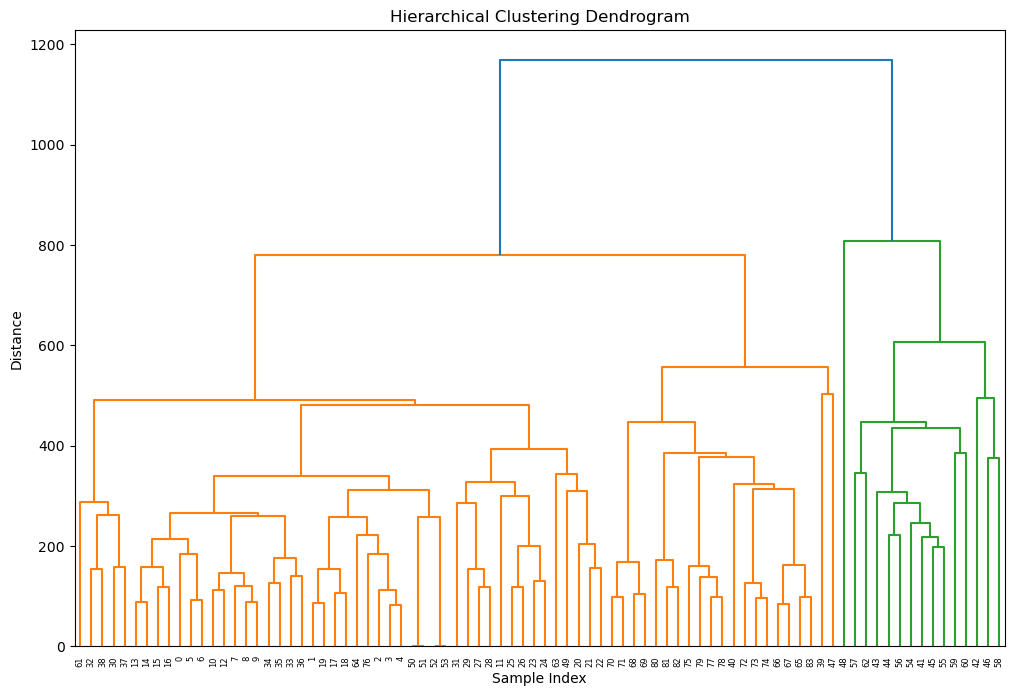


--- K-Means Clustering ---


c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

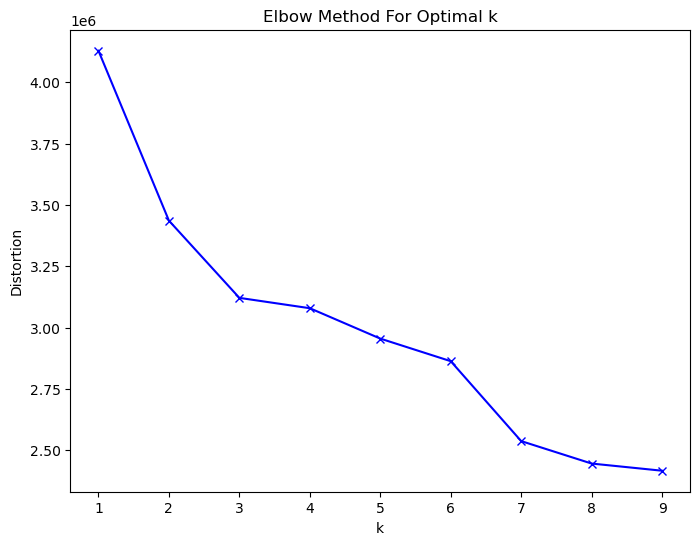

c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



=== Clustering Evaluation ===

Hierarchical Clustering Results:
Execution Time: 1.84 seconds
Silhouette Score: 0.140
Davies-Bouldin Index: 1.718

K-Means Clustering Results:
Execution Time: 0.28 seconds
Silhouette Score: 0.097
Davies-Bouldin Index: 1.871


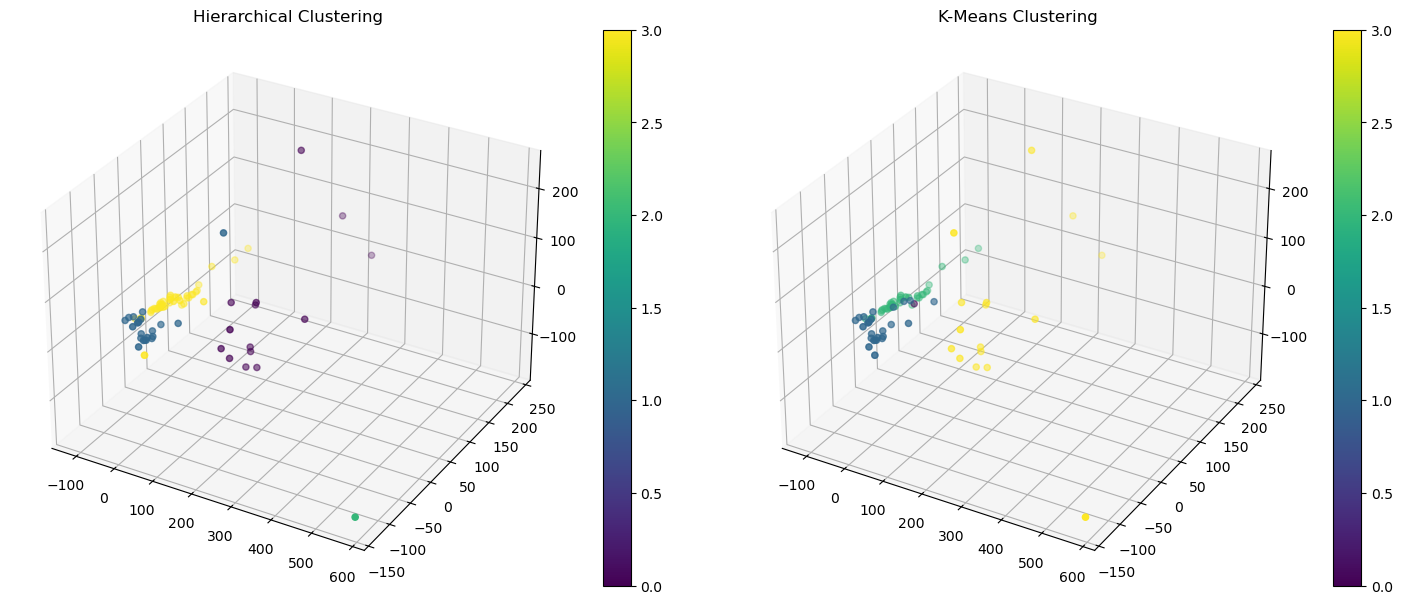


Recommendation: Hierarchical clustering appears more suitable for this dataset.


In [4]:
def load_and_preprocess_images(data_dir, target_size=(128, 128)):
    """Load and preprocess images from directory"""
    features = []
    labels = []
    classes = sorted(os.listdir(data_dir))
    
    print(f"Loading images from {data_dir}...")
    for label, cls in enumerate(classes):
        cls_folder = os.path.join(data_dir, cls)
        files_processed = 0
        for img_file in os.listdir(cls_folder):
            try:
                img_path = os.path.join(cls_folder, img_file)
                img = Image.open(img_path).resize(target_size).convert('RGB')
                img_array = np.array(img).flatten() / 255.0  # Normalize pixel values
                features.append(img_array)
                labels.append(label)
                files_processed += 1
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
        print(f"Processed {files_processed} images from class {cls}")
        
    return np.array(features), np.array(labels), classes

def prepare_data(features):
    """Prepare and preprocess the data"""
    # Check for outliers
    z_scores = stats.zscore(features)
    outliers = np.abs(z_scores) > 3
    outlier_percentage = (outliers.sum() / outliers.size) * 100
    print(f"\nOutlier Analysis:")
    print(f"Percentage of outliers: {outlier_percentage:.2f}%")
    
    # Standardize data
    scaler = StandardScaler()  # Using Scaler to handle outliers
    X_scaled = scaler.fit_transform(features)
    
    # Apply PCA
    pca = PCA(n_components=3)  # Keep 3 components for 3D visualization
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    print(f"\nPCA Explained Variance Ratio: {explained_variance.sum():.2%}")
    
    return X_scaled, X_pca

def visualize_clusters_3d(X_pca, y_hier, y_kmeans):
    """Create 3D visualization of clusters"""
    fig = plt.figure(figsize=(15, 6))
    
    # Hierarchical clustering plot
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_hier, cmap='viridis')
    ax1.set_title('Hierarchical Clustering')
    plt.colorbar(scatter1)
    
    # K-means clustering plot
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_kmeans, cmap='viridis')
    ax2.set_title('K-Means Clustering')
    plt.colorbar(scatter2)
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Set your paths
    train_dir = r"C:\Users\lsrin\Downloads\TS-2\Adavance_ML\Lab-5\TRAIL_DATA\TRAINING"  
    test_dir = r"C:\Users\lsrin\Downloads\TS-2\Adavance_ML\Lab-5\TRAIL_DATA\TESTING"    
    
    # Load and prepare data
    features, labels, classes = load_and_preprocess_images(train_dir)
    print(f"\nDataset Summary:")
    print(f"Total images: {len(features)}")
    print(f"Number of classes: {len(classes)}")
    print(f"Classes: {classes}")
    
    # Preprocess data
    X_scaled, X_pca = prepare_data(features)
    n_clusters = len(classes)
    
    # Hierarchical Clustering
    print("\n--- Hierarchical Clustering ---")
    start_time_hier = time.time()
    
    # Create and plot dendrogram
    linkage_matrix = linkage(X_scaled, method='ward')
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()
    
    # Perform hierarchical clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    y_hier = agg_clustering.fit_predict(X_scaled)
    hier_time = time.time() - start_time_hier
    
    # K-means Clustering
    print("\n--- K-Means Clustering ---")
    
    # Elbow method
    distortions = []
    K = range(1, min(10, len(features)))
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        distortions.append(kmeans.inertia_)
    
    # Plot elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    # Perform K-means clustering
    start_time_kmeans = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)
    kmeans_time = time.time() - start_time_kmeans
    
    # Evaluate and compare results
    print("\n=== Clustering Evaluation ===")
    
    # Calculate metrics
    metrics = {
        'Hierarchical': {
            'Silhouette': silhouette_score(X_scaled, y_hier),
            'Davies-Bouldin': davies_bouldin_score(X_scaled, y_hier),
            #'Calinski-Harabasz': calinski_harabasz_score(X_scaled, y_hier),
            'Time': hier_time
        },
        'K-Means': {
            'Silhouette': silhouette_score(X_scaled, y_kmeans),
            'Davies-Bouldin': davies_bouldin_score(X_scaled, y_kmeans),
            #'Calinski-Harabasz': calinski_harabasz_score(X_scaled, y_kmeans),
            'Time': kmeans_time
        }
    }
    
    # Print results
    for method, scores in metrics.items():
        print(f"\n{method} Clustering Results:")
        print(f"Execution Time: {scores['Time']:.2f} seconds")
        print(f"Silhouette Score: {scores['Silhouette']:.3f}")
        print(f"Davies-Bouldin Index: {scores['Davies-Bouldin']:.3f}")
        #print(f"Calinski-Harabasz Score: {scores['Calinski-Harabasz']:.3f}")
    
    # Visualize clusters in 3D
    visualize_clusters_3d(X_pca, y_hier, y_kmeans)
    
    # Make recommendation
    if metrics['K-Means']['Silhouette'] > metrics['Hierarchical']['Silhouette']:
        print("\nRecommendation: K-Means clustering appears more suitable for this dataset.")
    else:
        print("\nRecommendation: Hierarchical clustering appears more suitable for this dataset.")